# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [87]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [89]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [90]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [91]:
# Extract all rows of data
full_table = soup.find_all('table', class_ = 'table')
full_table

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [92]:
# Read the data table from the URL
site_data = pd.read_html(url)

# Extract the first table
dataframe = site_data[0]  # This is already a DataFrame

# Display the first few rows
dataframe.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [93]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
#DataFrame already created above

In [94]:
# Confirm DataFrame was created successfully
dataframe.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [95]:
# Examine data type of each column
print(dataframe.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [96]:
# Change data types for data analysis
#Change all except for the date column which shoudl remain as is
dataframe['sol'] = pd.to_numeric(dataframe['sol'], errors='coerce')
dataframe['ls'] = pd.to_numeric(dataframe['ls'], errors='coerce')
dataframe['month'] = pd.to_numeric(dataframe['month'], errors='coerce')
dataframe['min_temp'] = pd.to_numeric(dataframe['min_temp'], errors='coerce')
dataframe['pressure'] = pd.to_numeric(dataframe['pressure'], errors='coerce')


In [97]:
# Confirm type changes were successful by examining data types again
print(dataframe.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [98]:
# 1. How many months are there on Mars?
num_months = dataframe['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [99]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = dataframe['sol'].nunique()
print(f"Number of Martian days: {num_martian_days}")

Number of Martian days: 1867


In [100]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = dataframe.groupby('month')['min_temp'].mean()
avg_min_temp_per_month = pd.DataFrame(avg_min_temp_per_month)
avg_min_temp_per_month.head()

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725


<Axes: title={'center': 'Average Minimum Temp. by Month'}, xlabel='Month', ylabel='Average Min. Temp. (C)'>

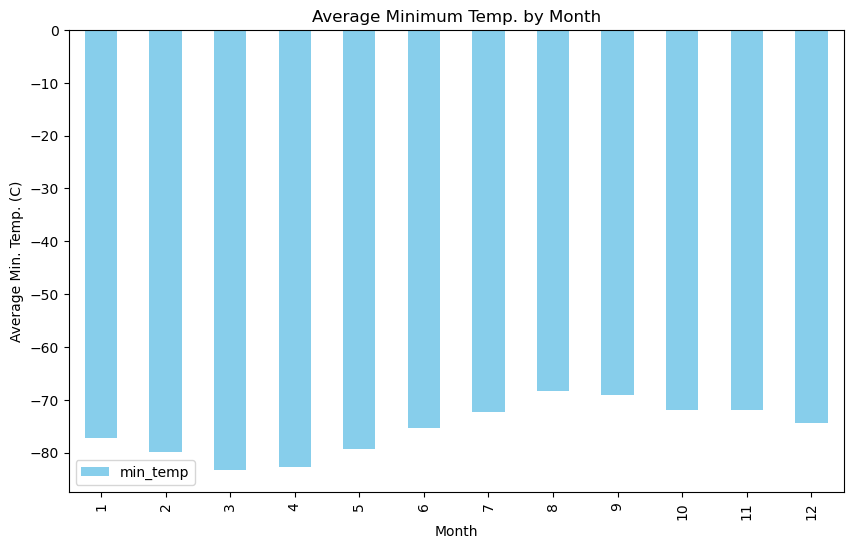

In [101]:
# Plot the average minimum temperature by month
avg_min_temp_per_month.plot(kind = 'bar', color = 'skyblue', figsize= (10,6),
                            title = 'Average Minimum Temp. by Month',
                            xlabel = 'Month', ylabel= 'Average Min. Temp. (C)')

In [102]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_min_temp_per_month.sort_values('min_temp')
coldest_month = sorted_avg_temp.min()
warmest_month = sorted_avg_temp.max()

print(f'Coldest month: {coldest_month['min_temp']}')
print(f'Warmest month: {warmest_month['min_temp']}')


Coldest month: -83.30729166666667
Warmest month: -68.38297872340425


In [103]:
# 4. What is the average pressure by month?
avg_pressure_per_month = dataframe.groupby('month')['pressure'].mean()
avg_pressure_per_month = pd.DataFrame(avg_pressure_per_month)
avg_pressure_per_month.head()


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047


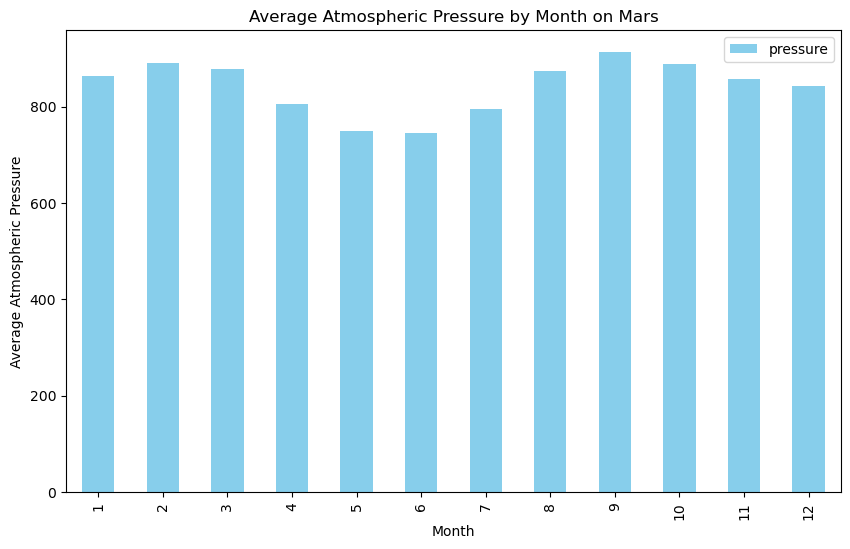

In [104]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind = 'bar', color = 'skyblue', figsize= (10,6),
                            title = 'Average Atmospheric Pressure by Month on Mars',
                            xlabel = 'Month', ylabel = 'Average Atmospheric Pressure');

In [105]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_per_month.sort_values('pressure')
lowest_pressure = sorted_avg_pressure.min()
highest_pressure = sorted_avg_pressure.max()

print(f'Month with lowest pressure: {lowest_pressure['pressure']}')
print(f'Month with highest pressure: {highest_pressure['pressure']}')

Month with lowest pressure: 745.0544217687075
Month with highest pressure: 913.3059701492538


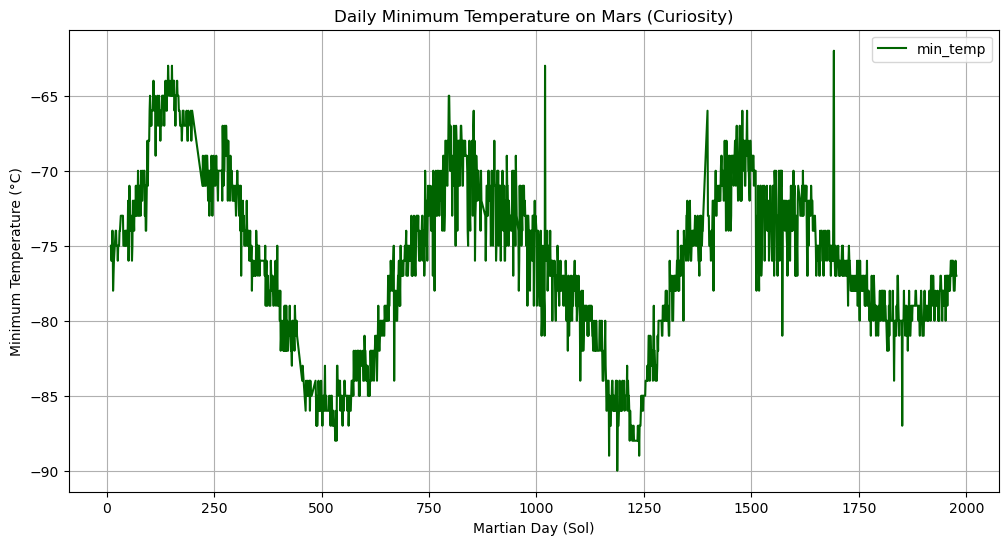

In [106]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
dataframe.plot(x='sol', y='min_temp', kind='line', figsize=(12, 6), color='darkgreen')
plt.title('Daily Minimum Temperature on Mars (Curiosity)')
plt.xlabel('Martian Day (Sol)')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

#### Minimum Temperature

The coldest month on Mars at Curiosity's location had an average minimum temperature of -83.31°C, while the warmest month had an average minimum temperature of -68.38°C. These temperatures are significantly lower than Earth's, with the coldest month reaching almost -83°C, which is much colder than any month on Earth. This temperature range highlights the harsh and freezing Martian climate, especially in areas where Curiosity is operating. The range between the coldest and warmest months suggests that while Mars does have seasonal variation, it remains consistently cold throughout the year.

#### Atmospheric Pressure

The month with the lowest atmospheric pressure on Mars recorded a pressure of 745.05 Pascals, while the month with the highest recorded pressure was 913.31 Pascals. To put this in perspective, the average pressure on Earth's surface is around 101,325 Pascals(according to Google), so Martian atmospheric pressure is much lower (about 1% of Earth's).

#### Year Length

Visually, by observing the patterns in temperature changes or pressure over the Martian days, we can estimate how long a Martian year might be. Based on the plot, it looks like a Martian year is about 2 Earth years. The temperature cycle and pressure cycle will repeat approximately every 600 - 700 Days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV

file_path = 'mars_data.csv'
dataframe.to_csv(file_path)


In [108]:
browser.quit()